# <center>  **<span style="font-size:80px;">Graph Construction for Matching</span>** </center>

# <center> Universidad de Alicante </center>
<p align="center"><img src=".ipynb_gfx/UA.png" width="330" height="190"></p>
<br>

**Nombre:** Santiago Álvarez Geanta <br>
**Fecha:** 7 de febrero de 2025 <br>
**Grado:** Ingeniería en Inteligencia Artificial <br>
**Grupo:** 1 <br>


### Profesores
- Francisco Escolano Ruíz
- Ahmed Begga Hachlafi
<br>

# 1.Implementacion

In [1]:
import numpy as np          # Import NumPy for numerical operations and array handling
from PIL import Image      # Import PIL (Python Imaging Library) for image processing
import scipy.io as sio     # Import SciPy's IO module for reading .mat files
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

## 1.1Función Delaunay

In [2]:
def delaunay_graph(kpts):

    # Crear la triangulación de Delaunay
    # kpts = [[x1, x2, x3, ...],
    #         [y1, y2, y3, ...]]]
    # Delaunay trabaja con kpts de la siguiente forma
    # kpts = [[x1, y1],
    #         [x2, y2],
    #         [ ... ]]
    tri = Delaunay(points= kpts.T) 

    edges = set()  # Evitamos duplicados de vértices

    # Recorremos cada triángulo en la triangulación
    for simplex in tri.simplices:
        # Cada triángulo tiene 3 aristas: (p1, p2), (p2, p3), (p3, p1)
        for i in range(3):
            # Ordenamos para evitar permutaciones 
            # Así nos aseguramos de no meter repeticiones en nuestro set
            edge = tuple(sorted((simplex[i], simplex[(i + 1) % 3])))  
            edges.add(edge)

    return list(edges)

## 1.2 Función KNN

In [3]:

def knn_graph(kpts, k):
    # kpts = [[x1, y1],
    #         [x2, y2],
    #         [ ... ]]
    kpts = kpts.T
    npuntos = kpts.shape[0]
    D = np.zeros(shape=(npuntos, npuntos))
    edges = set()

    for i in range(npuntos):
        for j in range(i+1, npuntos):
            p1 = kpts[i]
            p2 = kpts[j]
            
            # sqrt((x2-x1)**2 + (y2-y1)**2)
            D[i, j] = D[j,i] = np.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)  

    # Ordenamos filas por distancias de menor a mayor y obtener los k vecinos más cercanos para cada punto
    neighbors = np.argsort(D, axis=1)[:, 1:k+1]  # Ignoramos la primera columna (es la distancia a sí mismo)

    # Construir lista de edges (aristas)    edges = []
    for i in range(npuntos):
        for j in neighbors[i]:
            edges.add((i, j))  # Agregamos la arista (i, j)

    return list(edges)

## 1.3 Función muestreo de Imagenes

In [4]:
def plot_image_with_graph(algorithmType:str, obj_resize:tuple, filePath:str, k=4):
    """
    Function to visualize an image with keypoints and graph edges
    
    Parameters:
    - img: Input image
    - kpt: Keypoints (2, N) array
    - edges: List of (i, j) tuples representing graph edges
    """

    ##########################################################################

    # Carga imágenes dl Dataset
    img = Image.open(filePath+".png") 

    # Load keypoint annotations from corresponding .mat files
    # 'pts_coord' contains the coordinates of manually annotated keypoints for each image
    # Convert the MATLAB format to NumPy arrays for easier processing
    kpt = np.array(sio.loadmat(filePath+ ".mat")["pts_coord"])


    # Scale keypoint coordinates to match the new image dimensions
    # This ensures keypoints remain aligned when images are resized
    kpt[0] = kpt[0] * obj_resize[0] / img.size[0]  # Scale x-coordinates of first image keypoints
    kpt[1] = kpt[1] * obj_resize[1] / img.size[1]  # Scale y-coordinates of first image keypoints

    img = img.resize(obj_resize, resample=Image.BILINEAR)  # Resize second image
    
    match(algorithmType):
        case "delaunay":
            edges = delaunay_graph(kpts= kpt)
        case "knn":
            edges = knn_graph(kpts= kpt, k=k)
        case _:
            raise ValueError("plot_image_with_graph() -> algorithmType ha de ser 'delaunay' o 'knn'")
    ##########################################################################

    # Display the input image
    plt.imshow(img)
   
    # Plot keypoints as white dots with black edges
    plt.scatter(kpt[0], kpt[1], c='w', edgecolors='k')

    for i, j in edges:
        plt.plot([kpt[0, i], kpt[0, j]], [kpt[1, i], kpt[1, j]], 'r-')                        # black solid line style

## 1.4 Muestreo de Imágenes

En mi caso solamente voy a mostrar las imágenes de los patos, debido a que mostrar las otras categorías no significa ningún cambio respecto a este ejemplo. Tan solo habría que cambiar el filePath y ajustar que imágenes queremos mostrar.

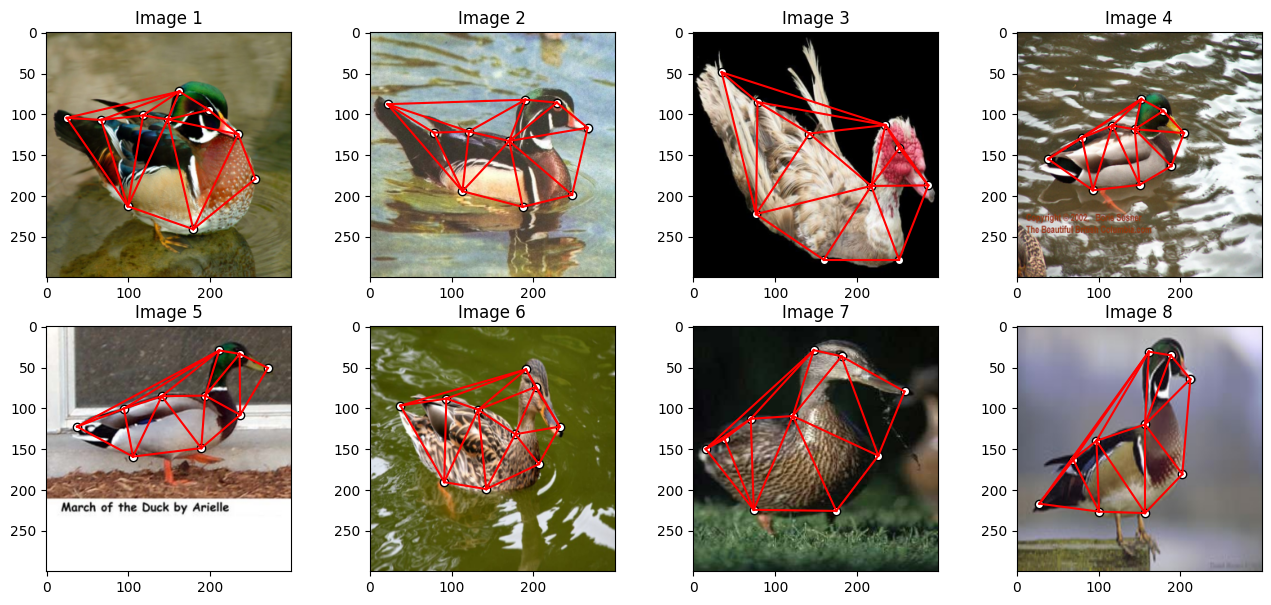

In [5]:
filePathDuck = "data/WillowObject/WILLOW-ObjectClass/Duck/"
plt.figure(figsize= (16, 7))

for indx, i in enumerate(["01","02", "03", "05", "06", "10", "11", "12"]):
    plt.subplot(2, 4, indx+1)
    plt.title(f"Image {indx+1}")      
    plot_image_with_graph(algorithmType="delaunay", obj_resize=(300, 300), filePath=filePathDuck+f"060_00{i}")  

plt.savefig("GraphMatching_Delaunay.png")

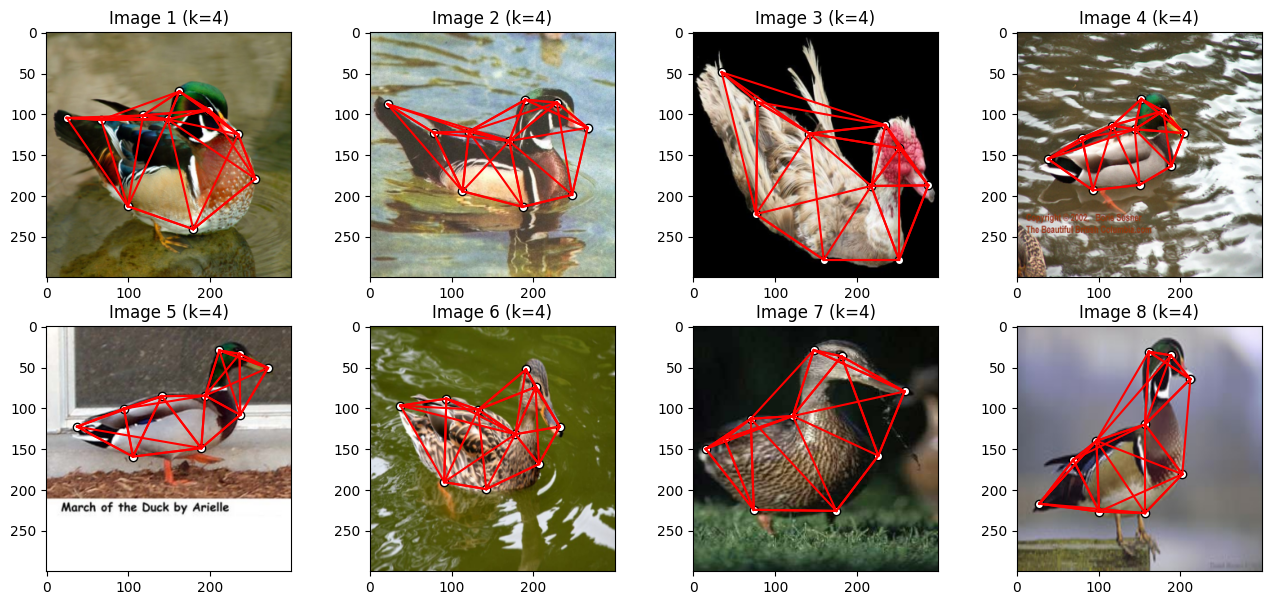

In [6]:
filePathDuck = "data/WillowObject/WILLOW-ObjectClass/Duck/"
plt.figure(figsize= (16, 7))
k = 4

for indx, i in enumerate(["01","02", "03", "05", "06", "10", "11", "12"]):
    plt.subplot(2, 4, indx+1)
    plt.title(f"Image {indx+1} (k={k})")      
    plot_image_with_graph(algorithmType="knn", obj_resize=(300, 300), filePath=filePathDuck+f"060_00{i}", k=k)

plt.savefig("GraphMatching_KNN.png")

### <center>Santiago Álvarez Geanta</center>
#### <center>Universidad de Alicante</center>
<p align="center"><img src=".ipynb_gfx/UA.png" width="165" height="95"></p>
